# Library Imports

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
%matplotlib inline

# Getting Insights about Data
<br>
Following cells explore a Dog Bark Sound file.

In [2]:
#path of test file
filename = 'UrbanSound8K/test_dog_bark.wav'

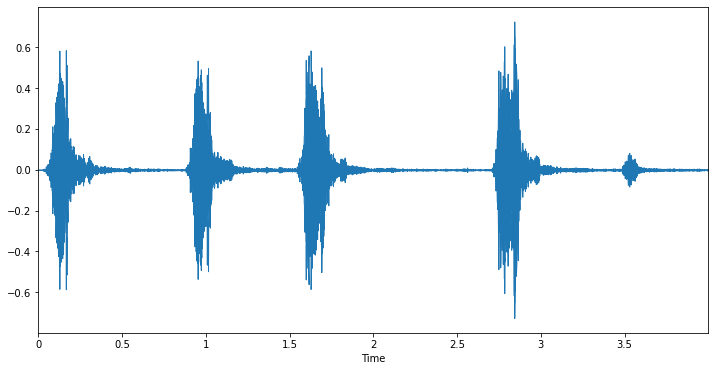

In [3]:
#plotting the audio in the test file as well as playing it out
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

Text(0.5, 0, 'Sample')

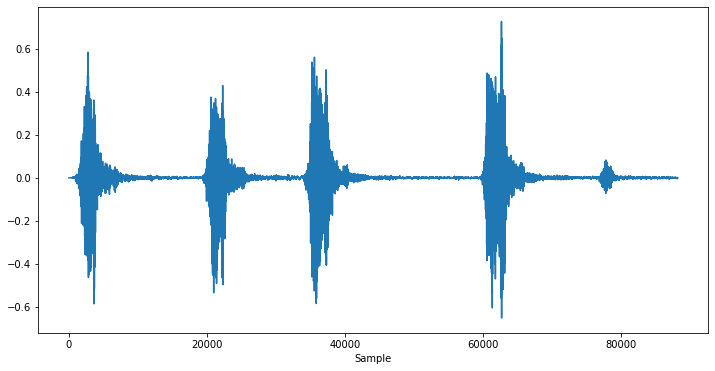

In [4]:
#another way of plotting data
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
axes.plot(data)
axes.set_xlabel('Sample')

In [5]:
#checking out the sample rate of librosa
sample_rate

22050

In [6]:
#checking out the data representation of sound files done by librosa
data

array([ 0.        ,  0.        ,  0.        , ...,  0.00036545,
        0.00025941, -0.00021183], dtype=float32)

## Data Representation in Librosa
* It seems data is normalized by Librosa between -1 to 1.
* It is one dimensional data which means audio is represented by only a single channel.

In [7]:
#verifying sample rate and number of samples
len(data)

88200

## Verification of Sample Rate of Librosa
<br>
We can see that for a 4sec long audio clip we have 88,200 data values. And since librosa samples audio files at a frequency of 22,050Hz, then, a 4sec long audio file will have 4×22,050 data samples, i.e. 88,200 data values.

## Note: The above values of sample rate and number of channels is default and the behaviour can be overriden. 

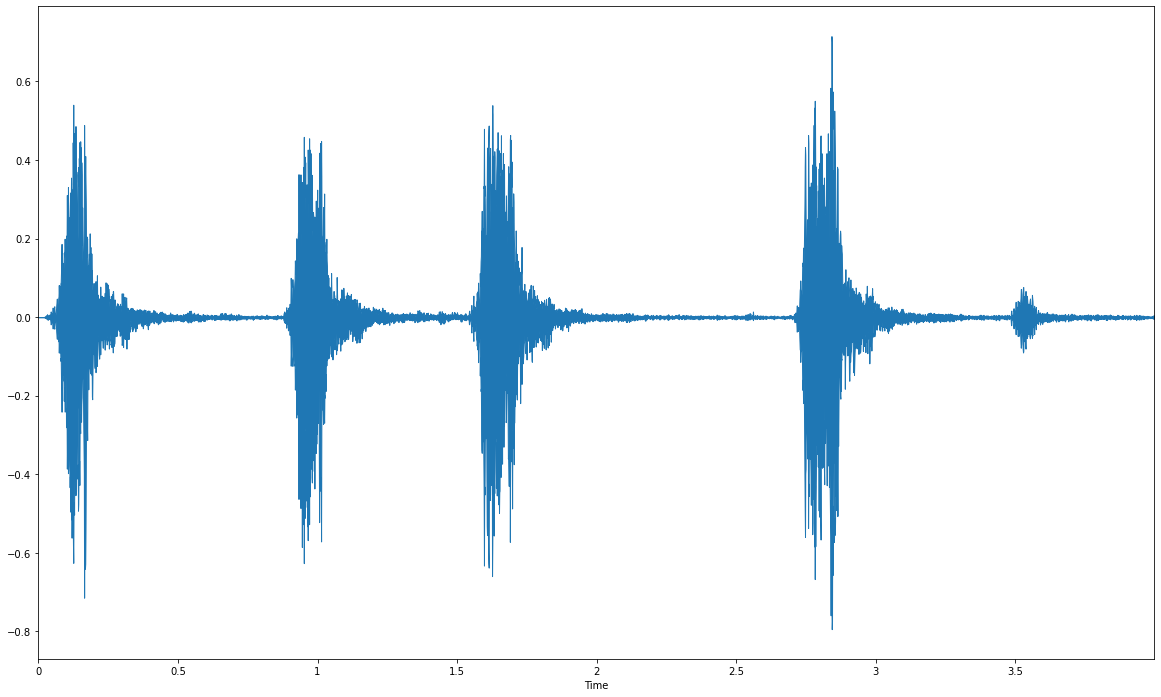

In [8]:
#loading the data in original number of channels
fig, axes = plt.subplots(1, 1, figsize=(20, 12))
data, sample_rate = librosa.load(filename, mono=False)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [9]:
#here we can see data is represented by 2 channels
data

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.4426853e-04,  5.7842967e-04,  7.7910197e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.3377073e-05, -5.9605729e-05, -5.0158007e-04]], dtype=float32)

Text(0.5, 1.0, 'Channel Two')

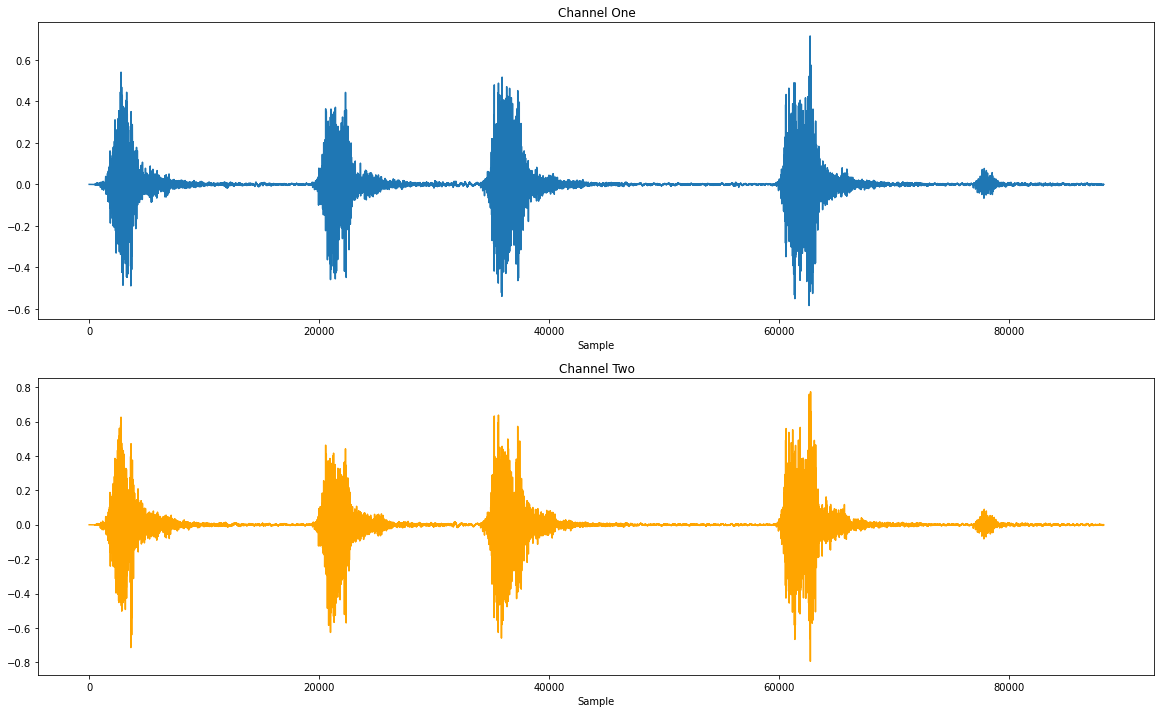

In [10]:
#dual channels can be better visualized using matplotlib plotting
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes[0].plot(data[0])
axes[1].plot(data[1], color='orange')
axes[0].set_xlabel('Sample')
axes[1].set_xlabel('Sample')
axes[0].set_title('Channel One')
axes[1].set_title('Channel Two')

# Getting Insights about Data
<br>
Following cells explore a Car Honk sound file.

In [11]:
#path of test file
filename = 'UrbanSound8K/test_car_honk.wav'

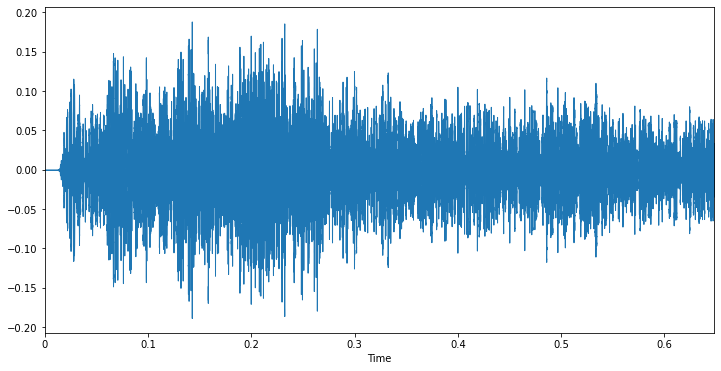

In [12]:
#plotting the audio in the test file as well as playing it out
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

# Getting Insights about Data
<br>
Following cells load the metadata.

In [13]:
#path of metadata file
metadata_path = 'UrbanSound8K/metadata/UrbanSound8K.csv'

In [14]:
#loading the metadata
metadata = pd.read_csv(metadata_path)
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
#checking if data is imbalanced
metadata['class'].value_counts()

jackhammer          1000
drilling            1000
dog_bark            1000
street_music        1000
children_playing    1000
engine_idling       1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Class Distribution Analysis
* Most of the classes are have the same number of audio files. 
* Classes like 'car_horn' and 'gun_shot' have less than half the number of files as compared to the other classes.
* Overall should work fairly fine.